In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [5]:
pData=pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
print(pData.shape)
pData.label.value_counts()

(235795, 56)


label
1    134850
0    100945
Name: count, dtype: int64

In [7]:
pData.dtypes

FILENAME                       object
URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode  

In [6]:
pData.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [47]:
import re  # Add this at the top if not already present

# Feature extraction
def extract_features_from_url(url):
    return {
        'URLLength': len(url),
        'HasHTTPS': int("https" in url.lower()),
        'NoOfSubDomain': url.count('.') - 1,
        'NoOfQMarkInURL': url.count('?'),
        'NoOfEqualsInURL': url.count('='),
        'NoOfAmpersandInURL': url.count('&'),
        'SpacialCharRatioInURL': len(re.findall(r'[^A-Za-z0-9]', url)) / len(url),
    }

# Apply feature extraction to your original dataset
pData['URLLength'] = pData['URL'].apply(lambda x: len(x))
pData['HasHTTPS'] = pData['URL'].apply(lambda x: int("https" in x.lower()))
pData['NoOfSubDomain'] = pData['URL'].apply(lambda x: x.count('.') - 1)
pData['NoOfQMarkInURL'] = pData['URL'].apply(lambda x: x.count('?'))
pData['NoOfEqualsInURL'] = pData['URL'].apply(lambda x: x.count('='))
pData['NoOfAmpersandInURL'] = pData['URL'].apply(lambda x: x.count('&'))
pData['SpacialCharRatioInURL'] = pData['URL'].apply(lambda x: len(re.findall(r'[^A-Za-z0-9]', x)) / len(x))

# Final features and target
features = ['URLLength', 'HasHTTPS', 'NoOfSubDomain', 'NoOfQMarkInURL',
            'NoOfEqualsInURL', 'NoOfAmpersandInURL', 'SpacialCharRatioInURL']
x = pData[features]
y = pData['label']

# Proceed with train-test split, model training, evaluation, etc.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=2)


In [9]:
# x.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,1,0,0,1,34,20,28,119,0,124
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,0,1,50,9,8,39,0,217
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,0,1,10,2,7,42,2,5
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,0,1,1,1,3,27,15,22,1,31
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,1,0,1,244,15,34,72,1,85


In [10]:
# y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [12]:
# for col in x.columns:
#     if x[col].dtype =='object':
#         unique_values = x[col].unique()[:5]
#         print(f"\nColumn '{col}' contains text data. Example: {unique_values}")


Column 'FILENAME' contains text data. Example: ['521848.txt' '31372.txt' '597387.txt' '554095.txt' '151578.txt']

Column 'URL' contains text data. Example: ['https://www.southbankmosaics.com' 'https://www.uni-mainz.de'
 'https://www.voicefmradio.co.uk' 'https://www.sfnmjournal.com'
 'https://www.rewildingargentina.org']

Column 'Domain' contains text data. Example: ['www.southbankmosaics.com' 'www.uni-mainz.de' 'www.voicefmradio.co.uk'
 'www.sfnmjournal.com' 'www.rewildingargentina.org']

Column 'TLD' contains text data. Example: ['com' 'de' 'uk' 'org' 'in']

Column 'Title' contains text data. Example: ['à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µà¹‰ à¸‚à¹ˆà¸²à¸§à¸\x81à¸µà¸¬à¸² à¸‚à¹ˆà¸²à¸§à¸šà¸±à¸™à¹€à¸—à¸´à¸‡ à¸\xadà¸±à¸žà¹€à¸”à¸—à¸ªà¸”à¹ƒà¸«à¸¡à¹ˆà¸—à¸¸à¸\x81à¸§à¸±à¸™ &#8211; à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸\x81à¸µà¸¬à¸² à¸‚à¹ˆà¸²à¸§à¸šà¸±à¸™à¹€à¸—à¸´à¸‡ à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µà¹‰ à¸\xadà¸±à¸›à¹€à¸”à¸•à¸‚à¹ˆà¸²à¸§à¸ªà¸²à¸£à¸£à¸§à¸”à¹€à¸£à¹‡à¸§à¸—à¸±à¸™à¹ƒà¸ˆ à¸žà¸£à¹‰à¸\xad

In [13]:
# from sklearn.model_selection import train_test_split
# xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=2)


In [15]:
# from sklearn.preprocessing import LabelEncoder
# for col in xTrain.columns:
#     # Check if column contains string data
#     if xTrain[col].dtype == 'object':
#         print(f"Encoding categorical column: {col}")
#         le = LabelEncoder()
#         # Combine train and test values to ensure all categories are encoded
#         all_values = pd.concat([xTrain[col], xTest[col]])
#         le.fit(all_values)
        
#         # Transform the data
#         xTrain[col] = le.transform(xTrain[col])
#         xTest[col] = le.transform(xTest[col])
#     else:
#         # For numeric columns, ensure they're float type and handle any issues
#         print(f"Processing numeric column: {col}")
#         # Replace any non-numeric values with NaN
#         xTrain[col] = pd.to_numeric(xTrain[col], errors='coerce')
#         xTest[col] = pd.to_numeric(xTest[col], errors='coerce')
        
#         # Fill NaN values with median
#         median_val = xTrain[col].median()
#         xTrain[col] = xTrain[col].fillna(median_val)
#         xTest[col] = xTest[col].fillna(median_val)


Encoding categorical column: FILENAME
Encoding categorical column: URL
Processing numeric column: URLLength
Encoding categorical column: Domain
Processing numeric column: DomainLength
Processing numeric column: IsDomainIP
Encoding categorical column: TLD
Processing numeric column: URLSimilarityIndex
Processing numeric column: CharContinuationRate
Processing numeric column: TLDLegitimateProb
Processing numeric column: URLCharProb
Processing numeric column: TLDLength
Processing numeric column: NoOfSubDomain
Processing numeric column: HasObfuscation
Processing numeric column: NoOfObfuscatedChar
Processing numeric column: ObfuscationRatio
Processing numeric column: NoOfLettersInURL
Processing numeric column: LetterRatioInURL
Processing numeric column: NoOfDegitsInURL
Processing numeric column: DegitRatioInURL
Processing numeric column: NoOfEqualsInURL
Processing numeric column: NoOfQMarkInURL
Processing numeric column: NoOfAmpersandInURL
Processing numeric column: NoOfOtherSpecialCharsInUR

In [17]:
# print("\nData types after processing:")
# print(xTrain.dtypes)


Data types after processing:
FILENAME                        int64
URL                             int64
URLLength                       int64
Domain                          int64
DomainLength                    int64
IsDomainIP                      int64
TLD                             int64
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS             

In [48]:
# Verify no NaN values remain
print("\nAny remaining NaN values in training data:", xTrain.isnull().sum().sum())
print("Any remaining NaN values in test data:", xTest.isnull().sum().sum())



Any remaining NaN values in training data: 0
Any remaining NaN values in test data: 0


In [49]:
xTrain.shape, yTrain.shape

((188636, 7), (188636,))

In [50]:
xTest.shape,yTest.shape

((47159, 7), (47159,))

random forest classifier

In [51]:
# Check for non-numeric columns in the dataset
print(xTrain.dtypes)


URLLength                  int64
HasHTTPS                   int64
NoOfSubDomain              int64
NoOfQMarkInURL             int64
NoOfEqualsInURL            int64
NoOfAmpersandInURL         int64
SpacialCharRatioInURL    float64
dtype: object


In [52]:
print(xTrain.columns)


Index(['URLLength', 'HasHTTPS', 'NoOfSubDomain', 'NoOfQMarkInURL',
       'NoOfEqualsInURL', 'NoOfAmpersandInURL', 'SpacialCharRatioInURL'],
      dtype='object')


In [53]:
print(xTrain.dtypes)


URLLength                  int64
HasHTTPS                   int64
NoOfSubDomain              int64
NoOfQMarkInURL             int64
NoOfEqualsInURL            int64
NoOfAmpersandInURL         int64
SpacialCharRatioInURL    float64
dtype: object


In [54]:
from sklearn.ensemble import RandomForestClassifier
print("\nTraining RandomForest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(xTrain,yTrain)


Training RandomForest model...


RandomForestClassifier(n_jobs=-1, random_state=42)

In [55]:
# Make predictions
rf_pred = rf_model.predict(xTest)

In [56]:
print(xTest.select_dtypes(include='object').columns)


Index([], dtype='object')


In [57]:
from sklearn.metrics import accuracy_score, classification_report
print("\nRandomForest Results:")
rf_accuracy = accuracy_score(yTest, rf_pred)
print(f"Accuracy: {rf_accuracy:.4f}")
print(classification_report(yTest, rf_pred))



RandomForest Results:
Accuracy: 0.9712
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     20237
           1       0.97      0.98      0.97     26922

    accuracy                           0.97     47159
   macro avg       0.97      0.97      0.97     47159
weighted avg       0.97      0.97      0.97     47159



In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import joblib

In [59]:
print("\nTraining XGBoost model...")
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1)
xgb_model.fit(xTrain, yTrain)


Training XGBoost model...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, ...)

In [60]:

# Make predictions
xgb_pred = xgb_model.predict(xTest)

In [61]:
# Evaluate XGBoost
print("\nXGBoost Results:")
xgb_accuracy = accuracy_score(yTest, xgb_pred)
print(f"Accuracy: {xgb_accuracy:.4f}")
print(classification_report(yTest, xgb_pred))



XGBoost Results:
Accuracy: 0.9711
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     20237
           1       0.97      0.98      0.97     26922

    accuracy                           0.97     47159
   macro avg       0.97      0.97      0.97     47159
weighted avg       0.97      0.97      0.97     47159



In [62]:
# Compare the models
print("\nModel Comparison:")
print(f"RandomForest accuracy: {rf_accuracy:.4f}")
print(f"XGBoost accuracy: {xgb_accuracy:.4f}")
print(f"Difference: {abs(rf_accuracy - xgb_accuracy):.4f}")



Model Comparison:
RandomForest accuracy: 0.9712
XGBoost accuracy: 0.9711
Difference: 0.0001


/var/folders/_n/sph109bs7bl30lzq6jnzzjtr0000gn/T/ipykernel_13340/2888894204.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


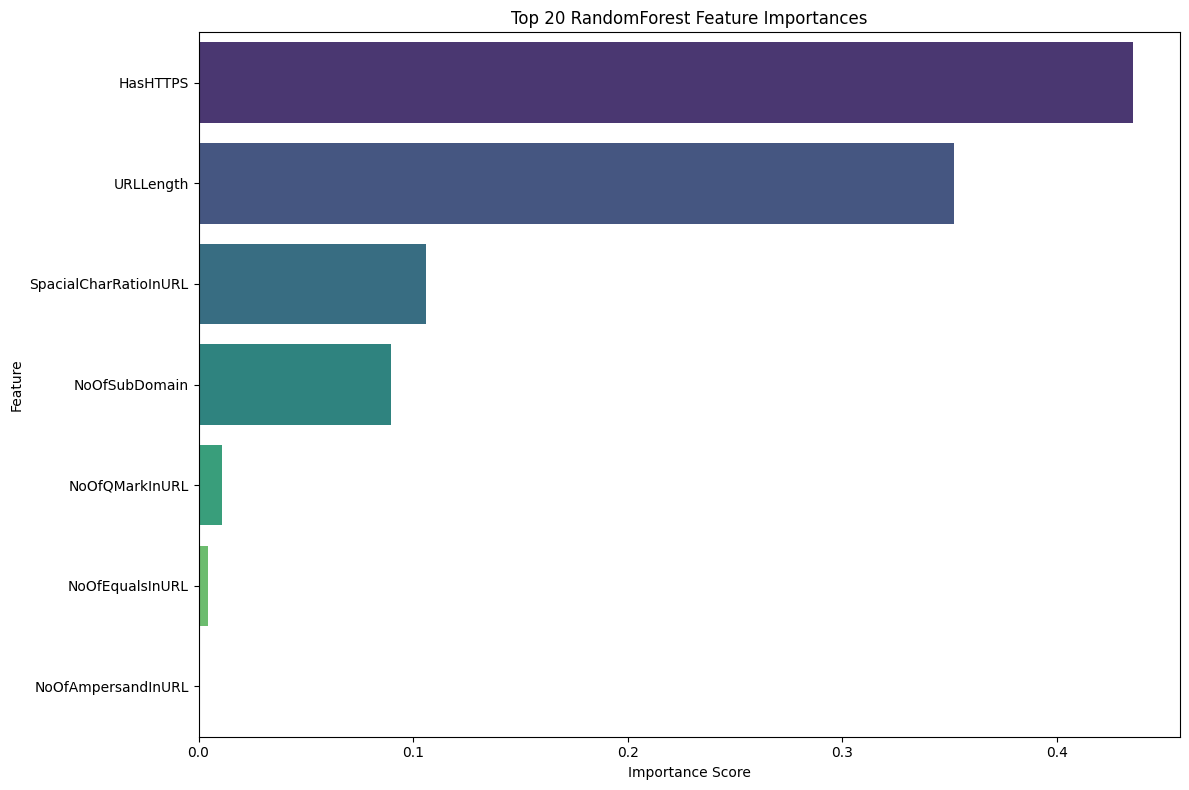

/var/folders/_n/sph109bs7bl30lzq6jnzzjtr0000gn/T/ipykernel_13340/2888894204.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


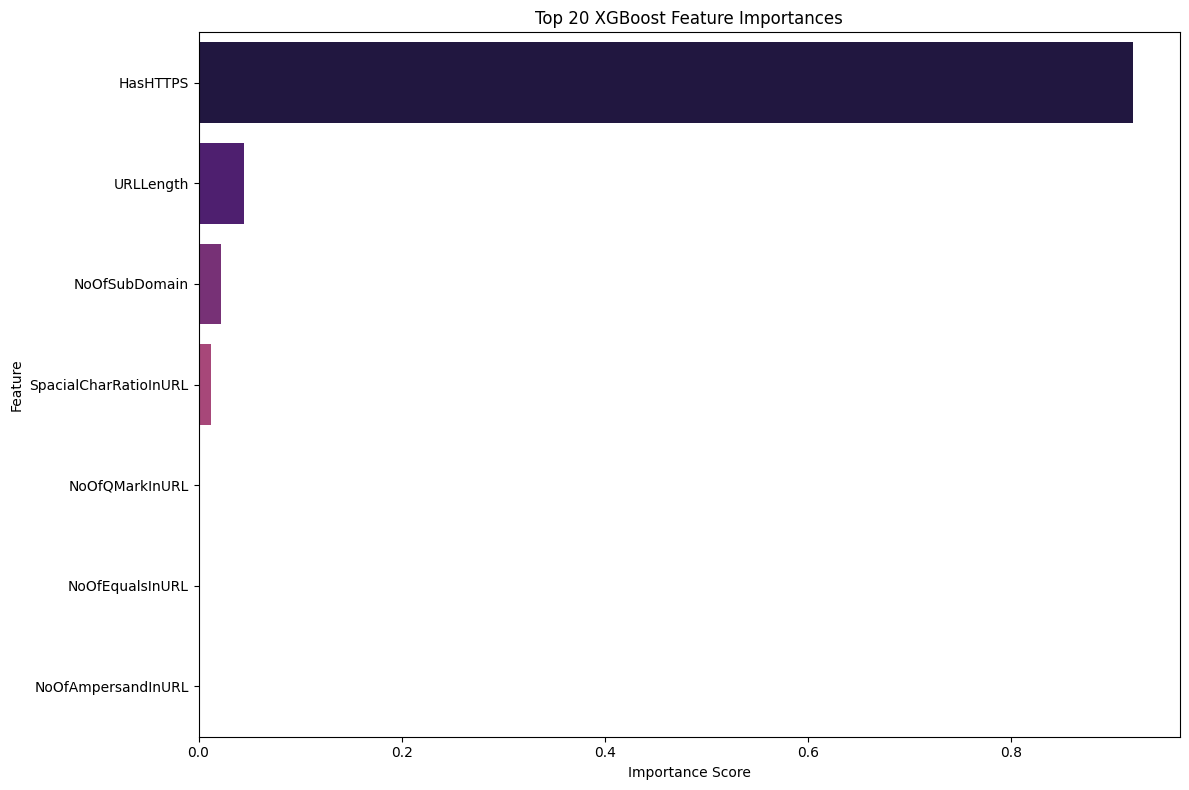

In [63]:
# Feature importance visualization function
def plot_feature_importance(model, model_name, X):
    # Get feature importances
    importances = model.feature_importances_
    
    # Create DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=feature_importance_df.head(20),
        x='Importance', y='Feature', 
        palette='viridis' if model_name == 'RandomForest' else 'magma'
    )
    plt.title(f'Top 20 {model_name} Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    
    return feature_importance_df

# Plot feature importances for both models
rf_importances = plot_feature_importance(rf_model, 'RandomForest', xTrain)
xgb_importances = plot_feature_importance(xgb_model, 'XGBoost', xTrain)


In [64]:
# # Save the best model
# best_model = rf_model if rf_accuracy >= xgb_accuracy else xgb_model
# best_model_name = 'RandomForest' if rf_accuracy >= xgb_accuracy else 'XGBoost'
# joblib.dump(best_model, f"best_phishing_model_{best_model_name}.pkl")
# print(f"\nSaved the best model ({best_model_name}) to disk")
joblib.dump(rf_model, "best_phishing_model_RandomForest.pkl")


['best_phishing_model_RandomForest.pkl']

In [65]:

# Define a prediction function for new URLs
def predict_phishing(url_data, model, encoders=None):
    """
    Predict if URLs are phishing or legitimate.
    
    Parameters:
    url_data - DataFrame with the same columns as the training data
    model - Trained model
    encoders - Dictionary of LabelEncoders (optional)
    
    Returns:
    Predictions (0 for legitimate, 1 for phishing)
    """
    # Make a copy to avoid modifying the original
    data = url_data.copy()
    
    # Process each column to match training data format
    for col in data.columns:
        if data[col].dtype == 'object':
            if encoders and col in encoders:
                # Use pre-trained encoders if available
                data[col] = data[col].apply(lambda x: x if x in encoders[col].classes_ else encoders[col].classes_[0])
                data[col] = encoders[col].transform(data[col])
            else:
                # If no encoders provided, create a new one
                le = LabelEncoder()
                le.fit(data[col])
                data[col] = le.transform(data[col])
        else:
            # Ensure numeric columns are properly formatted
            data[col] = pd.to_numeric(data[col], errors='coerce')
            data[col] = data[col].fillna(data[col].median())
    
    # Make predictions
    return model.predict(data)

print("\nPrediction function created for future use.")


Prediction function created for future use.


In [66]:
# Sample input demonstration - make sure to adjust this based on your actual dataset columns
print("\n--- Sample Usage ---")
print("# 1. Create a sample URL data with all required features")
print("sample_url_data = pd.DataFrame({")
print("    'URL': ['https://example.com/login'],")
print("    'Domain': ['example.com'],")
print("    # Add all other required columns from your dataset")
print("})")
print()
print("# 2. Load the saved model")
print("best_model = joblib.load('best_phishing_model_RandomForest.pkl')")
print()
print("# 3. Make prediction")
print("predictions = predict_phishing(sample_url_data, best_model)")
print("print('Result:', 'Phishing' if predictions[0] == 1 else 'Legitimate')")


--- Sample Usage ---
# 1. Create a sample URL data with all required features
sample_url_data = pd.DataFrame({
    'URL': ['https://example.com/login'],
    'Domain': ['example.com'],
    # Add all other required columns from your dataset
})

# 2. Load the saved model
best_model = joblib.load('best_phishing_model_RandomForest.pkl')

# 3. Make prediction
predictions = predict_phishing(sample_url_data, best_model)
print('Result:', 'Phishing' if predictions[0] == 1 else 'Legitimate')
